In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Creation of the pseudo-hourly data files for a year
# means will be 1.0 in all variables so they can just be scaled with the RCE values

In [3]:
day_len = 24
year_len = day_len * 365
print(year_len)
day_time = np.linspace(0,23,24)
print(day_time)

8760
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [4]:
lrad_day = np.ones((day_len))
srad_day = np.zeros((day_len))
rain_day = np.zeros((day_len))
snow_day = np.zeros((day_len))
rhum_day = np.zeros((day_len))
tair_day = np.zeros((day_len))
wind_day = np.ones((day_len))

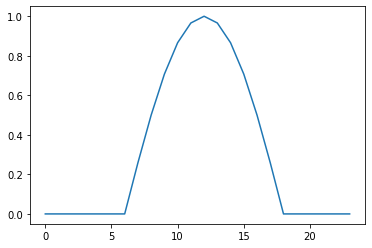

(8760,)
200.0


In [5]:
srad_rce = 200
srad_day = np.maximum(-np.cos(day_time*np.pi/12),0)
plt.plot(srad_day)
plt.show()
srad = np.tile(srad_day,365)
srad = srad/np.mean(srad)*srad_rce
print(srad.shape)
print(np.mean(srad))

[16.]
1.0


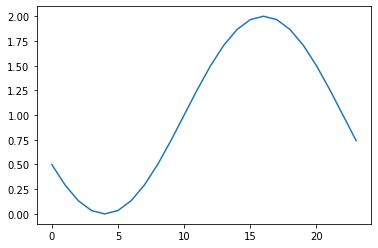

(8760,)
0.003


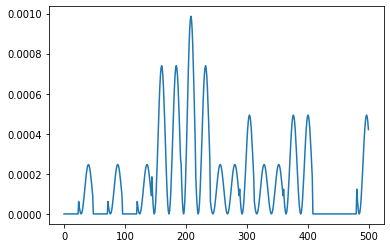

In [6]:
rain_rce = 3
rain_day = 1 - np.sin(day_time*np.pi/12+np.pi/6)
print(day_time[np.where(rain_day==np.max(rain_day))])
print(np.mean(rain_day))
plt.plot(rain_day)
plt.show()
daily_precip = np.random.poisson(1, 365)
rain = np.zeros((0))
for r in daily_precip:
    rain = np.append(rain,rain_day*r)
rain = rain/np.sum(rain)*365*rain_rce/1000
print(rain.shape)
print(np.mean(rain)*24)
plt.plot(rain[:500])
plt.show()

0.6999999999999998


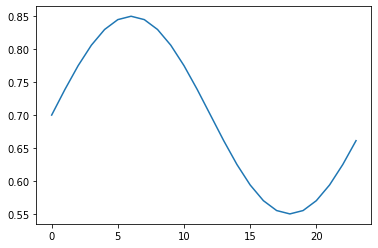

0.6999999999999998 (8760,)


In [7]:
RH_rce = 0.7
rhum_day = 1-(1-RH_rce)*2*np.sin(day_time*np.pi/24-np.pi/4)**2
rhum_day = RH_rce+(1-RH_rce)/2*np.sin(day_time*np.pi/12)
print(np.mean(rhum_day))
plt.plot(rhum_day)
plt.show()
rhum = np.tile(rhum_day,365)
print(np.mean(rhum),rhum.shape)

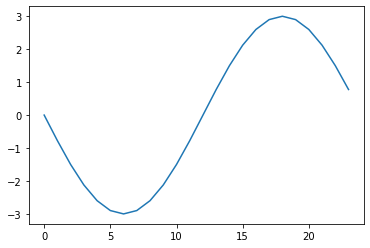

285.0 (8760,)


In [8]:
tair_rce = 285
tair_day = -3*np.sin(day_time*np.pi/12)
plt.plot(tair_day)
plt.show()
tair = np.tile(tair_day,365)
tair = tair-np.mean(tair)+tair_rce
np.savetxt('tair.txt',tair)
print(np.mean(tair),tair.shape)

In [9]:
lrad_rce = 400
lrad = np.tile(lrad_day,365)
lrad = lrad/np.mean(lrad)*lrad_rce
print(np.mean(lrad),lrad.shape)

400.0 (8760,)


In [10]:
snow = np.tile(snow_day,365)
print(np.mean(snow),snow.shape)

0.0 (8760,)


In [11]:
wind_rce = 10.
wind = np.tile(wind_day*wind_rce,365)
print(np.mean(wind),wind.shape)

10.0 (8760,)


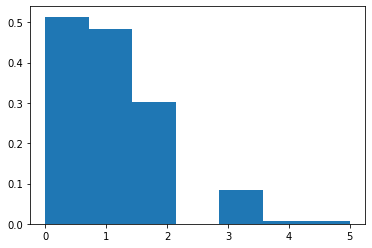

1.0082191780821919


In [12]:
s = np.random.poisson(1, 365)
count, bins, ignored = plt.hist(s, 7, density=True)

plt.show()
print(np.mean(s))